<a href="https://colab.research.google.com/github/RazgrizGhost/first_repository/blob/main/Project_1_Part_3_(Core)_JV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

filename = "/content/drive/MyDrive/02 Week 2: Pandas/sales_predictions.csv"

Mounted at /content/drive


In [3]:
sales_pred_df = pd.read_csv(filename)
display(sales_pred_df.head())
sales_pred_df.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

## # 1.  How many rows and columns? 

In [4]:
sales_pred_df.shape

(8523, 12)

## #2. What are the datatypes of each variable?

In [5]:
sales_pred_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## # 3. Are there duplicates? If so, drop any duplicates.

In [6]:
# 3. Are there duplicates? If so, drop any duplicates.
sales_pred_df.duplicated().sum()

0

## # 4. Identify missing values.

In [7]:
# 4. Identify missing values.
sales_pred_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## # 5. Decide on how to address the missing values and do it! 

In [8]:
# 5. Decide on how to address the missing values and do it! 
sales_pred_df.dropna(subset=['Item_Weight'], inplace=True) # dropping "Item Weight" since the info is not needed for sales predictions.
sales_pred_df.dropna(subset=['Outlet_Size'], inplace=True) # dropping "Outlet Size" since we can get that info on what "Outlet Type" it is.
display(sales_pred_df)
sales_pred_df.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


## # 6. Confirm that there are no missing values after addressing them.

In [9]:
# 6. Confirm that there are no missing values after addressing them.
sales_pred_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## # 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [10]:
# 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
sales_pred_df['Item_Identifier'].value_counts()

FDH26    5
FDL51    5
FDJ09    5
FDB15    5
FDC17    5
        ..
FDE40    1
FDF50    1
NCA42    1
FDK32    1
FDO03    1
Name: Item_Identifier, Length: 1535, dtype: int64

In [11]:
sales_pred_df['Item_Weight'].value_counts()

12.150    58
17.600    55
13.650    49
11.800    49
16.000    45
          ..
6.965      1
9.035      1
7.260      1
7.360      1
6.440      1
Name: Item_Weight, Length: 409, dtype: int64

In [12]:
sales_pred_df['Item_Fat_Content'].value_counts() # there were inconsistencies in this column

sales_pred_df['Item_Fat_Content'] = sales_pred_df['Item_Fat_Content'].replace('LF', 'Low Fat')
sales_pred_df['Item_Fat_Content'] = sales_pred_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_pred_df['Item_Fat_Content'] = sales_pred_df['Item_Fat_Content'].replace('reg', 'Regular')
sales_pred_df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [13]:
sales_pred_df['Item_Visibility'].value_counts()

0.000000    292
0.076975      3
0.121250      2
0.046825      2
0.026950      2
           ... 
0.039248      1
0.040946      1
0.031332      1
0.026841      1
0.044878      1
Name: Item_Visibility, Length: 4280, dtype: int64

In [14]:
sales_pred_df['Item_Type'].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [15]:
sales_pred_df['Item_MRP'].value_counts()

142.0154    6
172.0422    4
100.1016    4
146.9102    4
163.1184    3
           ..
156.4972    1
146.5418    1
51.0324     1
57.3930     1
75.4670     1
Name: Item_MRP, Length: 3806, dtype: int64

In [16]:
sales_pred_df['Outlet_Identifier'].value_counts()

OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [17]:
sales_pred_df['Outlet_Establishment_Year'].value_counts()

1987    932
1999    930
1997    930
2004    930
2009    928
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
sales_pred_df['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [19]:
sales_pred_df['Outlet_Location_Type'].value_counts()

Tier 1    1860
Tier 3    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [20]:
sales_pred_df['Outlet_Type'].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [21]:
sales_pred_df['Item_Outlet_Sales'].value_counts()

1342.2528    11
1438.1280    11
958.7520     10
703.0848     10
1845.5976     9
             ..
256.3330      1
3941.5360     1
3858.9768     1
5496.8448     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 2449, dtype: int64

## # 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [22]:
# 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).
sales_pred_df.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.0,4650.0,4650.0,4650.0,4650.0
mean,13.0,0.0,142.0,1999.0,2272.0
std,5.0,0.0,62.0,7.0,1498.0
min,5.0,0.0,31.0,1987.0,69.0
25%,9.0,0.0,94.0,1997.0,1125.0
50%,13.0,0.0,143.0,1999.0,1940.0
75%,17.0,0.0,187.0,2004.0,3112.0
max,21.0,0.0,267.0,2009.0,10257.0


# Task 3.
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


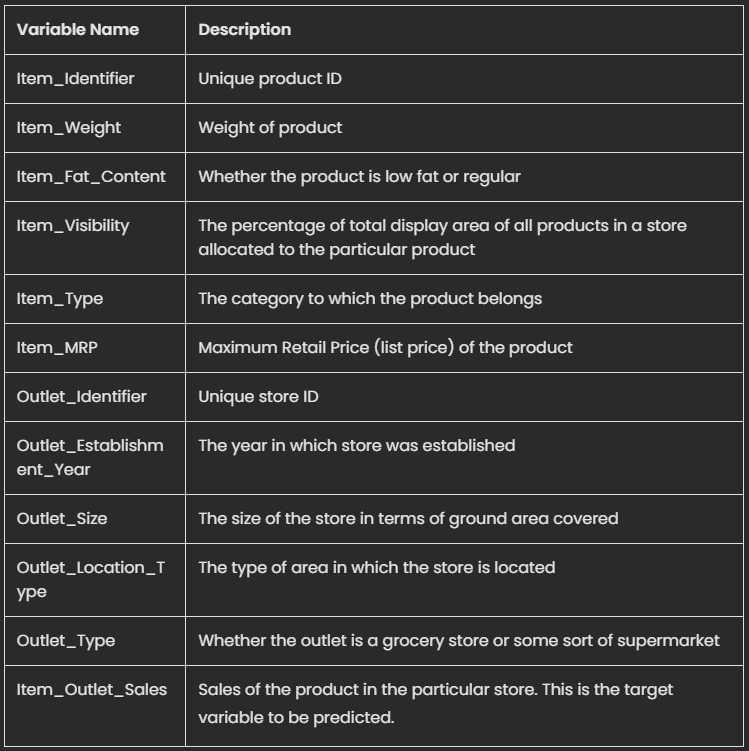

## Histograms


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
display(sales_pred_df)
sales_pred_df.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


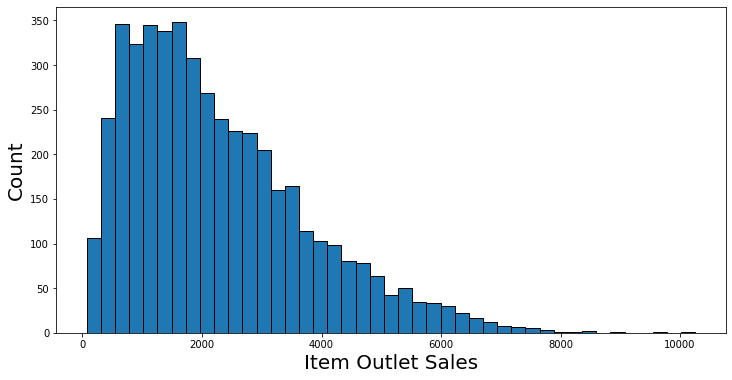

In [77]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(sales_pred_df["Item_Outlet_Sales"], edgecolor = "black", bins = 'auto')

ax.set_xlabel("Item Outlet Sales", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20);

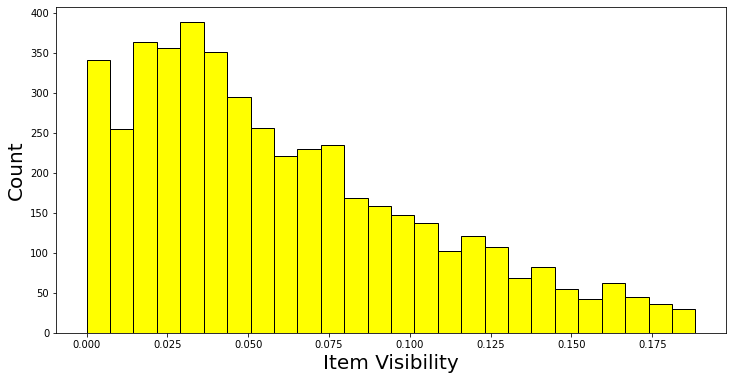

In [78]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(sales_pred_df["Item_Visibility"], color = "yellow", 
        edgecolor = "black", bins = 'auto')

ax.set_xlabel("Item Visibility", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20);

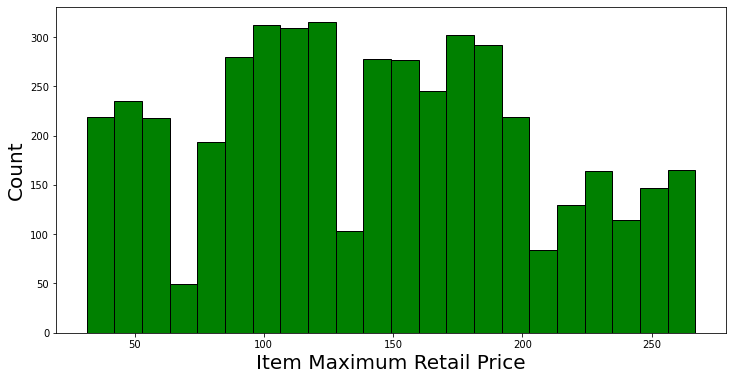

In [115]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(sales_pred_df["Item_MRP"], color = "green", edgecolor = "black", 
        bins = "auto",)

ax.set_xlabel("Item Maximum Retail Price", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20);

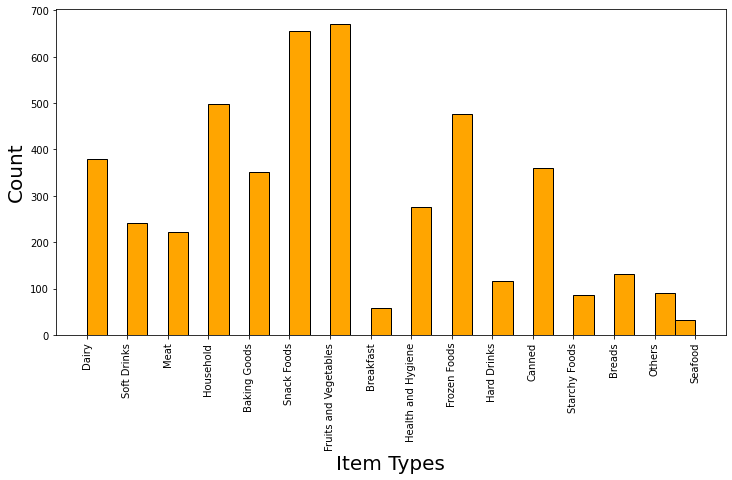

In [101]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(sales_pred_df["Item_Type"], color = "orange", edgecolor = "black", 
        bins = 30);

ax.set_xlabel("Item Types", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation = 90);

## Boxplots

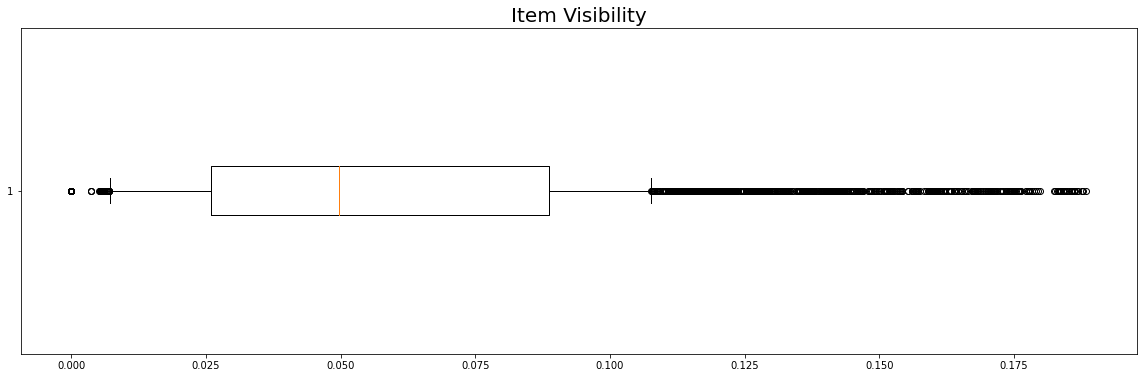

In [112]:
fig, ax = plt.subplots(figsize = (20,6))

ax.set_title("Item Visibility", fontsize = 20)

plt.boxplot(sales_pred_df["Item_Visibility"], vert = False, whis = 0.30);

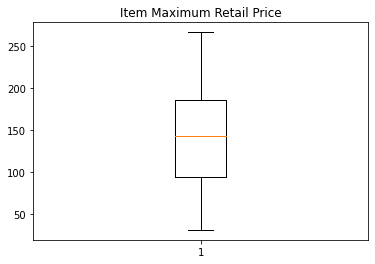

In [116]:
fig, ax = plt.subplots()

ax.set_title("Item Maximum Retail Price")

plt.boxplot(sales_pred_df["Item_MRP"]);

## Heatmaps

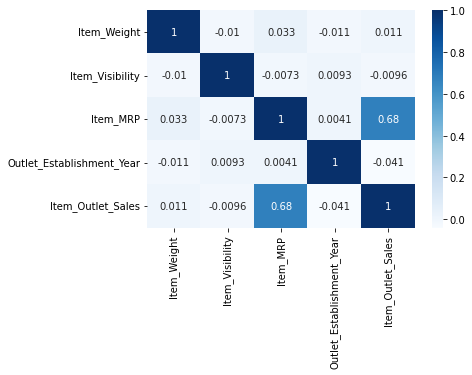

In [93]:
sales_corr = sales_pred_df.corr()

sns.heatmap(sales_corr, cmap = "Blues", annot = True);